In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy 
import os
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)

In [2]:
DATA_PATH = "./data/mind/"
TRAIN_DATA_PATH = os.path.join(DATA_PATH, "train/")
NEWS_TRAIN_DATA_PATH = os.path.join(TRAIN_DATA_PATH, "news.tsv")
BEHAVIORS_TRAIN_DATA_PATH = os.path.join(TRAIN_DATA_PATH, "behaviors.tsv")

In [3]:
data = pd.read_csv(NEWS_TRAIN_DATA_PATH, sep="\t", header=None)

In [4]:
data.columns = ['news_id', 
            "category",
            "subcategory",
            "title",
            "abstract",
            "url",
            "title_entities",
            "abstract_entities"
]
data.shape

(101527, 8)

In [5]:
data.head()

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,https://assets.msn.com/labs/mind/AABmf2I.html,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ..."
2,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
3,N86255,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
4,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."


In [6]:
data.isna().sum().sum()

5424

news_id                 0
category                0
subcategory             0
title                   0
abstract             5415
url                     0
title_entities          3
abstract_entities       6
dtype: int64

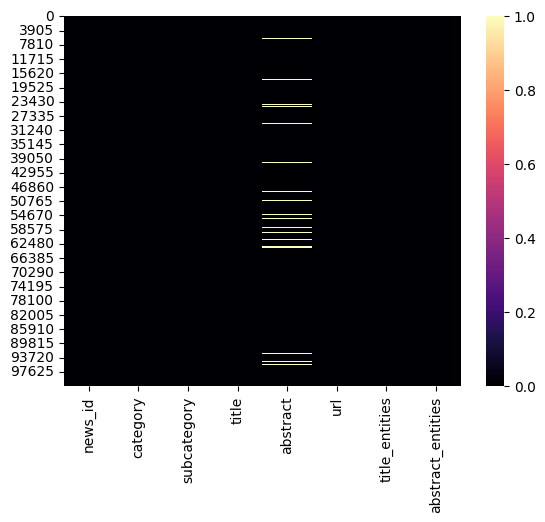

In [7]:
sns.heatmap(data.isnull(), cbar=True, cmap='magma')
data.isna().sum()

In [8]:
data.dropna(inplace=True)

In [9]:
data.sample(10)

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities
50792,N60234,sports,football_nfl,Time to raise the bar for Mitch Trubisky: 3 ke...,After going winless in October for the first t...,https://assets.msn.com/labs/mind/AAJGzrZ.html,"[{""Label"": ""Chicago Bears"", ""Type"": ""O"", ""Wiki...","[{""Label"": ""Chicago Bears"", ""Type"": ""O"", ""Wiki..."
1687,N40027,news,newspolitics,Trump's Republican support showing signs of er...,After chaos erupted in Syria and the president...,https://assets.msn.com/labs/mind/AAJ48bo.html,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Doral, Florida"", ""Type"": ""G"", ""Wik..."
49810,N117266,video,news,Prominent faith leaders differ on impeachment,While Reverends Franklin Graham and Robert Lee...,https://assets.msn.com/labs/mind/AAJ7eEe.html,[],"[{""Label"": ""Franklin Graham"", ""Type"": ""P"", ""Wi..."
1340,N71754,sports,baseball_mlb,The Nats are the biggest World Series underdog...,Caesars Sportsbook opened with the Astros as -...,https://assets.msn.com/labs/mind/AAJ4niq.html,"[{""Label"": ""Washington Nationals"", ""Type"": ""O""...","[{""Label"": ""Washington Nationals"", ""Type"": ""O""..."
53456,N102729,sports,football_nfl,Andrew Callahan's Patriots Report Card: Julian...,The Patriots pass defense locked down its most...,https://assets.msn.com/labs/mind/AAJugmD.html,"[{""Label"": ""New England Patriots"", ""Type"": ""O""...","[{""Label"": ""New England Patriots"", ""Type"": ""O""..."
54573,N69364,news,newsus,"Russian spy Maria Butina, 30, will be released...","Russian spy Maria Butina, 30, will be released...",https://assets.msn.com/labs/mind/AAJjRp5.html,"[{""Label"": ""Maria Butina"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Maria Butina"", ""Type"": ""P"", ""Wikid..."
76295,N18056,news,newsus,10-Year-Old Semaj O'Branty 'Hasn't Woken Up Ye...,Semaj O'Branty remains unconscious in the hosp...,https://assets.msn.com/labs/mind/BBWJ6sd.html,[],[]
71852,N67754,tv,tvnews,"44 years ago, Evel Knievel made death-defying ...","Forty-four years ago, Evel Knievel made a deat...",https://assets.msn.com/labs/mind/AAJkZR6.html,"[{""Label"": ""Evel Knievel"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Evel Knievel"", ""Type"": ""P"", ""Wikid..."
20356,N17902,sports,basketball_nba,Willie Cauley-Stein to learn 'on the fly' in W...,"While out with a left mid-foot sprain, Warrior...",https://assets.msn.com/labs/mind/AAJBB8B.html,"[{""Label"": ""Golden State Warriors"", ""Type"": ""O...","[{""Label"": ""Golden State Warriors"", ""Type"": ""O..."
4933,N53764,foodanddrink,newstrends,Shake Shack Stock Tumbles 20 Percent Over Grub...,"Plus, six major Asian restaurants are teaming ...",https://assets.msn.com/labs/mind/AAJWNdl.html,"[{""Label"": ""Shake Shack"", ""Type"": ""O"", ""Wikida...",[]


In [10]:
data.loc[9237, "abstract_entities"]

'[{"Label": "Tiger Woods", "Type": "P", "WikidataId": "Q10993", "Confidence": 1.0, "OccurrenceOffsets": [0], "SurfaceForms": ["Tiger Woods"]}, {"Label": "PGA Tour", "Type": "O", "WikidataId": "Q910409", "Confidence": 1.0, "OccurrenceOffsets": [48], "SurfaceForms": ["PGA Tour"]}, {"Label": "Sam Snead", "Type": "P", "WikidataId": "Q945056", "Confidence": 1.0, "OccurrenceOffsets": [17], "SurfaceForms": ["Sam Snead"]}]'

In [11]:
cat_counts = data["category"].value_counts()
px.bar(x=cat_counts.index, y=cat_counts.values)

In [12]:
c = data[["category", "subcategory"]].value_counts()
cat_subcat = list(zip(*c.keys()))
df = pd.DataFrame(columns=["cat", "subcat", "val"])
df["cat"] = cat_subcat[0]
df["sub_cat"] = cat_subcat[1]
df["val"] = c.values

In [13]:
px.bar(data_frame=df, x="cat", y="val", color="sub_cat")

In [16]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r"\w+")
data["title_num_word"] = data['title'].apply(lambda title: len(tokenizer.tokenize(title)))
data["abstract_num_word"] = data['abstract'].apply(lambda title: len(tokenizer.tokenize(title)))

In [17]:
cat_abstract_words = data.groupby("category")["abstract_num_word"].mean()
cat_title_words = data.groupby("category")['title_num_word'].mean()

In [18]:
px.bar(x=cat_title_words.keys(), y=cat_title_words.values)

In [20]:
px.bar(x=cat_abstract_words.keys(), y=cat_abstract_words.values)

In [21]:
px.histogram(data['title_num_word'], color=data['category'])

In [23]:
data[data["category"] == "middleeast"]

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities,title_num_word,abstract_num_word
18165,N98995,middleeast,middleeast-top-stories,Saudi says Baghdadi 'distorted' image of Islam...,Saudi Arabia said Monday that Islamic State le...,https://assets.msn.com/labs/mind/AAJsYXt.html,"[{""Label"": ""Abu Bakr al-Baghdadi"", ""Type"": ""P""...","[{""Label"": ""Abu Bakr al-Baghdadi"", ""Type"": ""P""...",9,29
20085,N126389,middleeast,middleeast-top-stories,"Rocket falls in Baghdad's Green Zone, killing one",A rocket fell inside Baghdad's heavily fortifi...,https://assets.msn.com/labs/mind/AAJBApe.html,"[{""Label"": ""Green Zone"", ""Type"": ""U"", ""Wikidat...","[{""Label"": ""Green Zone"", ""Type"": ""U"", ""Wikidat...",9,21


In [22]:
px.histogram(data['abstract_num_word'], color=data['category'])

In [46]:
data[data["abstract"].str.startswith("A gallery of recent winners on the PGA Tour")]

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities,title_num_word,abstract_num_word
37,N35648,sports,golf,PGA Tour winners,A gallery of recent winners on the PGA Tour.,https://assets.msn.com/labs/mind/AAjnQjj.html,"[{""Label"": ""PGA Tour"", ""Type"": ""O"", ""WikidataI...","[{""Label"": ""PGA Tour"", ""Type"": ""O"", ""WikidataI...",3,9


In [45]:
abstract_duplicates = data[data["abstract"].duplicated()]
abstract_duplicates[abstract_duplicates["abstract"].str.startswith("Being haunted does seem fitting")]

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities,title_num_word,abstract_num_word
241,N20278,sports,football_nfl,Patriots' Kyle Van Noy amused over Sam Darnold...,Being haunted does seem fitting with Halloween...,https://assets.msn.com/labs/mind/AAJaBXq.html,"[{""Label"": ""Sam Darnold"", ""Type"": ""P"", ""Wikida...","[{""Label"": ""New England Patriots"", ""Type"": ""O""...",10,28
26661,N8569,sports,football_nfl,Patriots' Kyle Van Noy amused over Sam Darnold...,Being haunted does seem fitting with Halloween...,https://assets.msn.com/labs/mind/AAJasp8.html,"[{""Label"": ""Sam Darnold"", ""Type"": ""P"", ""Wikida...","[{""Label"": ""New England Patriots"", ""Type"": ""O""...",10,28
27253,N86651,sports,football_nfl,Patriots' Kyle Van Noy amused over Sam Darnold...,Being haunted does seem fitting with Halloween...,https://assets.msn.com/labs/mind/AAJauTU.html,"[{""Label"": ""Sam Darnold"", ""Type"": ""P"", ""Wikida...","[{""Label"": ""New England Patriots"", ""Type"": ""O""...",10,28
27458,N17620,sports,football_nfl,Patriots' Kyle Van Noy amused over Sam Darnold...,Being haunted does seem fitting with Halloween...,https://assets.msn.com/labs/mind/AAJav22.html,"[{""Label"": ""Sam Darnold"", ""Type"": ""P"", ""Wikida...","[{""Label"": ""New England Patriots"", ""Type"": ""O""...",10,28


In [37]:
data[data["title"].duplicated()]

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities,title_num_word,abstract_num_word
241,N20278,sports,football_nfl,Patriots' Kyle Van Noy amused over Sam Darnold...,Being haunted does seem fitting with Halloween...,https://assets.msn.com/labs/mind/AAJaBXq.html,"[{""Label"": ""Sam Darnold"", ""Type"": ""P"", ""Wikida...","[{""Label"": ""New England Patriots"", ""Type"": ""O""...",10,28
409,N12095,sports,football_nfl,Adrian Peterson had to 'hold back tears' in re...,Adrian Peterson returned to Minnesota on Thurs...,https://assets.msn.com/labs/mind/AAJl4BQ.html,"[{""Label"": ""Adrian Peterson"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Adrian Peterson"", ""Type"": ""P"", ""Wi...",11,36
430,N54430,sports,football_nfl,Wolverines in the NFL: Top performances from W...,Below are notable performances from former Mic...,https://assets.msn.com/labs/mind/AAJwpiP.html,"[{""Label"": ""National Football League"", ""Type"":...","[{""Label"": ""Taco Charlton"", ""Type"": ""P"", ""Wiki...",9,70
1346,N38330,sports,basketball_nba,Nets coach Kenny Atkinson explains use of Denn...,Kenny Atkinson went viral for a poster he thre...,https://assets.msn.com/labs/mind/AAJJcSV.html,"[{""Label"": ""Kenny Atkinson"", ""Type"": ""P"", ""Wik...","[{""Label"": ""Kenny Atkinson"", ""Type"": ""P"", ""Wik...",10,24
1370,N18950,sports,football_ncaa,"Michigan finally shows some fight, but can't s...","UNIVERSITY PARK, Pa. -- Fans on their way out ...",https://assets.msn.com/labs/mind/AAJ47pp.html,[],"[{""Label"": ""Beaver Stadium"", ""Type"": ""S"", ""Wik...",11,70
...,...,...,...,...,...,...,...,...,...,...
101424,N104747,travel,travelarticle,"VA, DC Good News: Nats Fans Engaged, Safest Ci...","Good news on DC, NoVA Patches includes fans ge...",https://assets.msn.com/labs/mind/BBWyymS.html,"[{""Label"": ""Veterans Day"", ""Type"": ""H"", ""Wikid...","[{""Label"": ""Veterans Day"", ""Type"": ""H"", ""Wikid...",11,22
101451,N93121,finance,finance-real-estate,Sunday Real Estate: 3 Luxurious Florida Homes,"Sunday Real Estate takes you to Star Island, L...",https://assets.msn.com/labs/mind/BBWyzQK.html,"[{""Label"": ""Real estate"", ""Type"": ""U"", ""Wikida...","[{""Label"": ""Lakewood Ranch, Florida"", ""Type"": ...",7,12
101480,N97038,news,newsoffbeat,Humpback Whale Tail; Cop And Kitten Photo Shoo...,It's your state; It's your shot. This is Calif...,https://assets.msn.com/labs/mind/BBWz2Up.html,"[{""Label"": ""California"", ""Type"": ""G"", ""Wikidat...","[{""Label"": ""California"", ""Type"": ""G"", ""Wikidat...",11,13
101508,N109606,news,newsus,"Still teaching at 95, Jimmy Carter draws devot...","PLAINS, Ga. (AP) The pilgrims arrive early a...",https://assets.msn.com/labs/mind/BBWzBrF.html,"[{""Label"": ""Jimmy Carter"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Jimmy Carter"", ""Type"": ""P"", ""Wikid...",10,80


In [28]:
# import httplib2
# from tqdm import tqdm
# import threading
# from typing import List, Iterator
# def check_url(link, valid_urls):
#     if int(resp[0]['status']) < 400:
#         print("exist")
#         valid_urls.append(link)


# def chunker_list(seq, size) -> Iterator[List[str]]:
#     for pos in range(0, len(seq), size):
#         yield seq[pos:pos + size]



# h = httplib2.Http()
# valid_urls = []
# for link in tqdm(data["url"].values):
#     resp = h.request(link, 'HEAD')
#     if int(resp[0]['status']) < 400:
#         print("exist")
#         valid_urls.append(link)
# # assert int(resp[0]['status']) < 400

In [13]:
import pandas as pd
import numpy as np
import re
import json
# Load the news data
news_df = pd.read_csv(NEWS_TRAIN_DATA_PATH, sep='\t', header=None, names=['id', 'category', 'subcategory', 'title', 'abstract', 'url', 'title_entities', 'abstract_entities'])
news_df = news_df.dropna(subset=['title', 'abstract'])
news_df['title'] = news_df['title'].apply(lambda x: x.lower())
news_df['abstract'] = news_df['abstract'].apply(lambda x: x.lower())

In [52]:
behaviors = pd.read_csv(BEHAVIORS_TRAIN_DATA_PATH, sep="\t", header=None, names=["impression_id", "uid", ""])

In [53]:
behaviors.shape

(2232748, 5)

In [54]:
behaviors

,0,1,2,3,4
0,1,U87243,11/10/2019 11:30:54 AM,N8668 N39081 N65259 N79529 N73408 N43615 N2937...,N78206-0 N26368-0 N7578-0 N58592-0 N19858-0 N5...
1,2,U598644,11/12/2019 1:45:29 PM,N56056 N8726 N70353 N67998 N83823 N111108 N107...,N47996-0 N82719-0 N117066-0 N8491-0 N123784-0 ...
2,3,U532401,11/13/2019 11:23:03 AM,N128643 N87446 N122948 N9375 N82348 N129412 N5...,N103852-0 N53474-0 N127836-0 N47925-1
3,4,U593596,11/12/2019 12:24:09 PM,N31043 N39592 N4104 N8223 N114581 N92747 N1207...,N38902-0 N76434-0 N71593-0 N100073-0 N108736-0...
4,5,U239687,11/14/2019 8:03:01 PM,N65250 N122359 N71723 N53796 N41663 N41484 N11...,N76209-0 N48841-0 N67937-0 N62235-0 N6307-0 N3...
...,...,...,...,...,...
2232743,2232744,U316192,11/13/2019 6:50:02 PM,N122359 N37069 N95876 N28787 N73408 N11266 N61321,N113723-0 N123683-1 N5287-0 N76677-0 N53474-0
2232744,2232745,U451238,11/12/2019 8:54:06 AM,N12575 N93816 N71643 N87236 N87236,N18861-0 N20990-0 N43085-0 N7937-1
2232745,2232746,U151246,11/13/2019 12:42:51 PM,N27587 N49668,N39887-1 N22811-0 N110709-1 N1923-0 N24001-1 N...
2232746,2232747,U330725,11/12/2019 1:22:57 PM,N121944 N91510 N42280 N60061 N63032 N125223 N4...,N18947-0 N88808-1 N10012-0 N38902-0 N33078-0 N...
